#Decoding of emotional cues from physiological responses

This notebook demonstrates how to run a decoding analysis applied to physiological responses obtained from a subject observing emotional visual stimuli.

To get started, let's clone the course github containing our experimental files

In [1]:
!git clone https://github.com/StolkArjen/interacting-minds.git
# to remove the folder, use: !rm -rf interacting-minds
# to clear all outputs, go to Edit > Clear all outputs, followed by Runtime > Restart

Cloning into 'interacting-minds'...
remote: Enumerating objects: 34465, done.
remote: Counting objects: 100% (1797/1797), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 34465 (delta 1678), reused 1777 (delta 1667), pack-reused 32668
Receiving objects: 100% (34465/34465), 116.01 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (33995/33995), done.
Checking out files: 100% (34198/34198), done.


Add the code folder to the path

In [5]:
import os, sys
sys.path.append(os.getcwd() + '/interacting-minds/code')

Read data from a subject into the workspace

In [6]:
from read_iworx import read_iworx

data, event = read_iworx(os.getcwd() + '/interacting-minds/data/EMG_FA22/IME')

print(event.value)
print(event.sample)
print(data.label)
print(len(data.trial))
print(len(data.trial[0]))
print(len(data.trial[0][0]))

['smile', 'neutral', 'Smile', 'Neutral', 'Frown', 'Neutral', 'Smile', 'Smile', 'Neutral', 'Frown', 'Neutral', 'Smile', 'Neutral', 'Frown', 'Neutral', 'Blank', 'Blank', '+Dog2', 'Blank', '+Baby2', 'Blank', '-Spider2', 'Blank', '+Friends2', 'Blank', '-Snake', 'Blank', '+Dog1', 'Blank', '-Dog1', 'Blank', '+Cat2', 'Blank', '-Dog2', 'Blank', '-Spider1', 'Blank', '+Dog3', 'Blank', '-Face', 'Blank', '+Friends1', 'Blank', '-Spider3', 'Blank', '+Baby1', 'Blank', '-Cut', 'Blank', '-Gun', 'Blank', '+Cat-Dog', 'Blank', '-Sore', 'Blank', '+Cat1', 'Blank']
[38407.469, 38430.261, 38503.237, 38514.333, 38524.309, 38532.157, 38549.221, 38554.181, 38560.485, 38569.021, 38578.149, 38588.309, 38596.157, 38602.981, 38611.789, 38694.333, 38722.285, 38727.365, 38732.349, 38737.429, 38742.413, 38747.485, 38752.477, 38757.549, 38762.541, 38767.613, 38772.605, 38777.677, 38782.661, 38787.733, 38792.725, 38797.797, 38802.789, 38807.861, 38812.853, 38817.837, 38822.909, 38827.901, 38832.973, 38837.965, 38843.037,

Data has the following nested fields: .trial .time .label

Event has the following nested fields: .type .sample .value

Let's sort our stimuli per emotion type, either positive (+) or negative (-), and get their sample indices

In [7]:
posidx = [i for i, e in enumerate(event.value) if e[0] == '+']
negidx = [i for i, e in enumerate(event.value) if e[0] == '-']

possmp = [event.sample[p] for p in posidx]
negsmp = [event.sample[p] for p in negidx]

print(possmp)
print(negsmp)

[38727.365, 38737.429, 38757.549, 38777.677, 38797.797, 38827.901, 38848.029, 38868.157, 38898.261, 38918.397]
[38747.485, 38767.613, 38787.733, 38807.861, 38817.837, 38837.965, 38858.093, 38878.212, 38888.285, 38908.333]


Now let's extract data samples from around the presentation of each stimulus based on the above sample indices

In [9]:
import numpy as np

pre  = 1 # in seconds
post = 1
fs   = 1000 # sample frequency (samples per second)

posdat = []
for t in range(len(data.time)): # loop through trials
  for e in range(len(posidx)): # loop through events
      if possmp[e]-pre > data.time[t][0] and possmp[e]+post < data.time[t][-1]:
          idx = data.time[t].index(possmp[e])
          posdat.append(data.trial[t][:,idx-(pre*fs):idx+(post*fs)])

negdat = []
for t in range(len(data.time)): # loop through trials
  for e in range(len(negidx)): # loop through events
      if negsmp[e]-pre > data.time[t][0] and negsmp[e]+post < data.time[t][-1]:
          idx = data.time[t].index(negsmp[e])
          negdat.append(data.trial[t][:,idx-(pre*fs):idx+(post*fs)])

Let's take a look at the averages

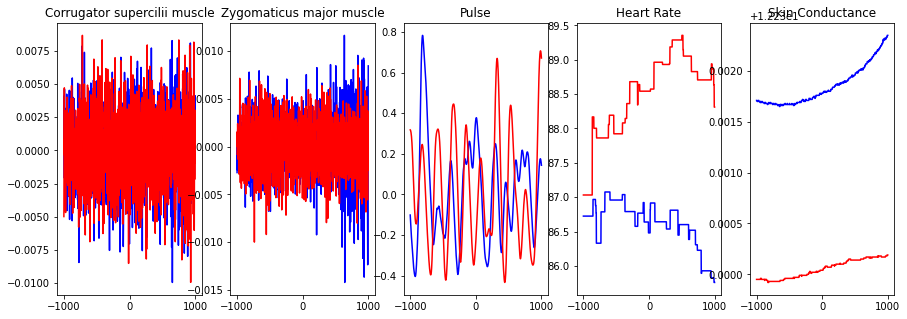

In [10]:
import matplotlib.pyplot as plt

time = range(-pre*fs, post*fs, 1)
posavg = np.nanmean(posdat, axis=0)
negavg = np.nanmean(negdat, axis=0)

fig, axs = plt.subplots(1,5, figsize=(15,5))
for p in range(len(posavg)):
  axs[p].plot(time, posavg[p,:], 'b')
  axs[p].plot(time, negavg[p,:], 'r')
  axs[p].title.set_text(data.label[p])

Here's where we perform the actual decoding analysis. Let's try to decode positive and negative emotional cues from the physiological responses. In brief, we combine the positive and negative trials into one dataset. Next, we create a labels vector with 0 and 1s corresponding to the positive and negative trials. Finally, we assess statistically whether we can draw a hyperplane that differentiates between the two classes (positive, negative). We use cross-validation to this effect.

(20, 5, 2000) (20,)
(20, 2, 2000)
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 accuracy with a standard deviation of 0.11
0.31 a

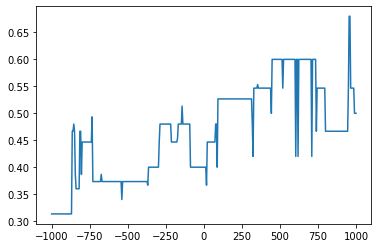

In [21]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score

# create the data matrix and labels
X = np.concatenate((posdat, negdat), axis=0)
y = np.concatenate((np.zeros(len(posdat)), np.ones(len(negdat))), axis=0)
print(X.shape, y.shape)

# use only HR and SC for decoding
hridx = data.label.index('Heart Rate')
scidx = data.label.index('Skin Conductance')
X = X[:,[hridx, scidx],:]
print(X.shape)

# loop across multiple segments for dynamic decoding
winlen   = 5 # samples
segments = np.array_split(X, X.shape[2]/winlen, axis=2)
scores   = []
for s in segments:
  seg = np.reshape((s), (s.shape[0], s.shape[1]*s.shape[2])) # collapse 2nd and 3rd dims
  clf = svm.SVC(kernel='linear', C=1, random_state=42) # fit the hyperplane
  scores.append(cross_val_score(clf, seg, y, cv=5, scoring='f1_macro')) # 5-fold cross-val
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[-1].mean(), scores[-1].std()))

# plot the average scores over time
scoavg  = np.nanmean(scores, axis=1)
segtime = np.linspace(time[0], time[-1], num=len(segments))
plt.plot(segtime, scoavg)

For more details on the overall procedure and pertinent parameters, take a look at: https://scikit-learn.org/stable/modules/cross_validation.html